# 3강. 비지도 학습(군집화)

이번 시간에는 **비지도 학습** 방법론에 대해 공부했습니다. 이번 실습에서는 Pandas를 활용해 수집된 결과물을 전처리하고 비지도 학습 방법론 중 하나인 **데이터 군집화**를 해보도록 하겠습니다.<br>
이번에 활용할 데이터는 **포켓몬 게임 데이터**입니다. 웹 상에 있는 정보를 수집해서 **포켓몬별 능력치와 성향에 따라 군집**을 만들어보도록 하겠습니다.

기본적으로 모델링 이전에 어떤 방향으로 **탐색적 데이터 분석(EDA; Exploratory Data Analysis)**을 거칩니다. 수치만으로 파악하기 어려운 데이터의 분포를 시각화하여 살펴보고, 이를 통해 얻은 인사이트를 기반으로 분석을 세워나가는 것입니다.


**학습 목표**
1. Pandas를 이용한 데이터프레임 핸들링
2. Matplotlib과 Seaborn을 이용한 데이터 시각화
3. Scikit-learn을 활용한 군집화(Clustering)

In [ ]:
# 한글 폰트 설치
# 이 셀을 실행시키고 '런타임 > 세션 다시 시작'을 해주세요

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

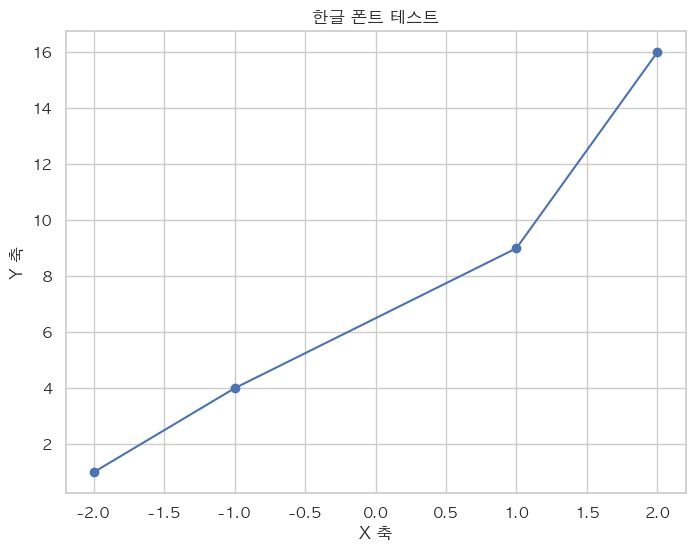

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
sns.set_theme(font ='AppleGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

# 샘플 플롯 생성
plt.figure(figsize=(8, 6))
plt.plot([-2, -1, 1, 2], [1, 4, 9, 16], marker='o')
plt.title('한글 폰트 테스트')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.grid(True)

# 플롯 표시
plt.show()

## Pandas 주요 함수 및 메소드

이번 실습은 **포켓몬 도감**에서 능력치를 가져와 비지도 학습으로 **군집화**하는 것이 목표입니다.<br>
이번에는 `requests`를 활용해 표를 가지고 오고, Pandas를 이용해 쉽게 처리하는 방법을 설명드리겠습니다.<br>

1. 영문 포켓몬 도감 가지고 오기
2. 한글 포켓몬 도감 가지고 오기
3. 영문 - 한글 포켓몬 도감 병합하기

이번 분석 과제에서 활용되는 **Pandas 주요 함수**를 살펴보겠습니다.

**데이터프레임 생성 예제**
```python
import pandas as pd

# 데이터프레임 생성 예제
data = {
    'Column1': ['A', 'B', 'C', 'D', 'A'],
    'Column2': [1, 2, 3, 4, 1],
    'Column3': [10, 20, 30, 40, 10]
}
df = pd.DataFrame(data)
```

**결측값 제거** `df.dropna()`

**결측값 채우기**
```python
df.fillna(0)  # 0으로 채우기
df.fillna(method='ffill')  # 이전 값으로 채우기
df.fillna(method='bfill')  # 다음 값으로 채우기
```


**loc를 사용한 데이터 선택**
```python
# 인덱스 이름을 사용하여 행과 열 선택
df.loc[0, 'Column1']  # 첫 번째 행의 'Column1' 값
df.loc[:, ['Column1', 'Column3']]  # 모든 행의 'Column1'과 'Column3' 열 선택
df.loc[df['Column2'] > 2, :]  # 조건에 맞는 행의 모든 열 선택
```

**iloc를 사용한 데이터 선택**
```python
# 정수 위치를 사용하여 행과 열 선택
df.iloc[0, 0]  # 첫 번째 행의 첫 번째 열 값
df.iloc[:, [0, 2]]  # 모든 행의 첫 번째와 세 번째 열 선택
df.iloc[1:3, :]  # 두 번째부터 세 번째 행의 모든 열 선택
```
**중복값 제거** `df.drop_duplicates()`

**중복값 확인** `df.duplicated()`

**중복값을 가진 행 선택** `df[df.duplicated()]`

**행 삭제** `df.drop(index=1)`

**열 삭제** `df.drop(columns='Column1')`

**새로운 열 추가** `df['NewColumn'] = df['Column2'] + df['Column3']`

**기존 열 수정** `df['Column2'] = df['Column2'] * 2`

**단일 열 선택** `df['Column1']`

**여러 열 선택** `df[['Column1', 'Column3']]`

**조건에 맞는 데이터 선택** `df[df['Column2'] > 2]`

**데이터 정렬**
```python
df.sort_values(by='Column3')  # 오름차순 정렬
df.sort_values(by='Column3', ascending=False)  # 내림차순 정렬
```

**병합**
```python
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value2': [4, 5, 6]})
merged_df = pd.merge(df1, df2, on='key', how='inner')  # inner join
merged_df = pd.merge(df1, df2, on='key', how='outer')  # outer join
merged_df = pd.merge(df1, df2, on='key', how='left')  # left join
merged_df = pd.merge(df1, df2, on='key', how='right')  # right join
```

**그룹별 합계** `df.groupby('Column1').sum()`

**그룹별 평균** `df.groupby('Column1').mean()`

**그룹별 다양한 통계량** `df.groupby('Column1').agg(['mean', 'sum', 'count'])`

**데이터프레임 요약 정보** `df.info()`

**기초 통계량 요약** `df.describe()`

**피벗 테이블 생성** `df.pivot(index='Column1', columns='Column2', values='Column3')`

**열 이름 변경** `df.rename(columns={'Column1': 'NewColumnName'})`

**깊은 복사** `df_copy = df.copy()`

**데이터프레임 행 방향으로 합치기** `df_append = df.append(df2, ignore_index=True)` (참고: 지금은 concat 활용을 권장합니다.)

**데이터프레임 열 방향으로 합치기** `df_concat = pd.concat([df1, df2], axis=1)`

In [2]:
# 필요한 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [3]:
def get_soup(url):
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')
    
    return soup

In [4]:
# BeautifulSoup으로 영문 포켓몬 도감 수집
url = 'https://pokemondb.net/pokedex/all'
soup = get_soup(url)

In [5]:
# 표 태그 찾기
# HTML 테이블은 <table> 태그로 시작하고, 여러 개의 행(row)은 <tr> 태그로, 각 행의 데이터는 <td> 태그로 정의
html_table = soup.find('table')

In [6]:
# 표를 데이터 프레임으로 바로 가지고 오기
from io import StringIO

# soup형식이기 때문에 문자열 데이터로 변경
html_table_str = str(html_table)
html_table_io = StringIO(html_table_str)

en_df = pd.read_html(html_table_io)[0]



In [7]:
en_df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60
1212,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85
1213,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85


In [8]:
len(en_df)

1215

In [9]:
en_df = en_df.drop_duplicates(subset=['#'])

In [10]:
en_df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
5,5,Charmeleon,Fire,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...
1208,1021,Raging Bolt,Electric Dragon,590,125,73,91,137,89,75
1209,1022,Iron Boulder,Rock Psychic,590,90,120,80,68,108,124
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60


In [11]:
# 한글 포켓몬 도감 수집
url = 'https://pokemon.fandom.com/ko/wiki/%EC%A0%84%EA%B5%AD%EB%8F%84%EA%B0%90'
soup = get_soup(url)

In [12]:
# 한글 포켓몬 도감 데이터 프레임 생성
kr_df = pd.DataFrame()
for html_table in soup.find_all('table')[:-1]:
    kr_df_part = pd.read_html(StringIO(str(html_table)))[0]
    kr_df_part['지방'] = [re.sub('도감', '지방', kr_df_part.columns[0])]*len(kr_df_part)
    kr_df = pd.concat([kr_df, kr_df_part])

## 데이터 전처리

In [13]:
# 한글 포켓몬 도감 확인
kr_df

# 여기에서 어떤 데이터를 가지고 와야 할지 봅시다.

,관동도감,전국도감,아이콘,포켓몬,타입,타입.1,지방,성도도감,호연도감,신오도감,하나도감,센트럴/코스트/마운틴 칼로스도감,알로라도감,가라르도감,히스이도감,팔데아도감
0,#001,#0001,NaN,이상해씨,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#002,#0002,NaN,이상해풀,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#003,#0003,NaN,이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,#0003,NaN,메가이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#004,#0004,NaN,파이리,불꽃,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,#1021,NaN,날뛰는우레,전기드래곤,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#237블루베리
120,NaN,#1022,NaN,무쇠암석,바위에스퍼,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#239블루베리
121,NaN,#1023,NaN,무쇠감투,강철에스퍼,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#238블루베리
122,NaN,#1024,NaN,테라파고스,노말,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#240블루베리


### 컬럼 추출 | 중복값 제거 | 데이터 병합

In [14]:
# loc를 이용하여 특정 컬럼(또는 로우)를 추출하는 방법
kr_df.loc[:, ['전국도감', '포켓몬', '지방']]

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방
...,...,...,...
119,#1021,날뛰는우레,팔데아지방
120,#1022,무쇠암석,팔데아지방
121,#1023,무쇠감투,팔데아지방
122,#1024,테라파고스,팔데아지방


In [15]:
kr_df = kr_df[
    ['전국도감', '포켓몬', '지방']
].copy(); kr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 123
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전국도감    1187 non-null   object
 1   포켓몬     1187 non-null   object
 2   지방      1187 non-null   object
dtypes: object(3)
memory usage: 37.1+ KB


In [16]:
# 리스트 인덱싱을 통해 특정 컬럼만 추출하는 방법
# kr_df.iloc[:,:]
kr_df.iloc[:5, :3]

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방


In [17]:
print(kr_df.columns)

Index(['전국도감', '포켓몬', '지방'], dtype='object')


In [18]:
# 병합을 위해 전국 도감 텍스트 전처리
kr_df['전국도감'] = kr_df['전국도감'].map(lambda x : int(re.sub('#', '', x)))

In [19]:
kr_df

,전국도감,포켓몬,지방
0,1,이상해씨,관동지방
1,2,이상해풀,관동지방
2,3,이상해꽃,관동지방
3,3,메가이상해꽃,관동지방
4,4,파이리,관동지방
...,...,...,...
119,1021,날뛰는우레,팔데아지방
120,1022,무쇠암석,팔데아지방
121,1023,무쇠감투,팔데아지방
122,1024,테라파고스,팔데아지방


In [20]:
len(kr_df)

1187

In [21]:
# 전국도감 열의 value 중 중복된 value 출력
kr_df_dup = kr_df[kr_df.duplicated(subset=['전국도감'], keep=False)]
kr_df_dup['전국도감'].unique()

array([   3,    6,    9,   15,   18,   19,   20,   26,   27,   28,   37,
         38,   50,   51,   52,   53,   58,   59,   65,   74,   75,   76,
         77,   78,   79,   80,   83,   88,   89,   94,  100,  101,  103,
        105,  110,  115,  122,  127,  128,  130,  142,  144,  145,  146,
        150,  157,  181,  194,  208,  211,  212,  214,  215,  222,  229,
        248,  254,  257,  260,  263,  264,  282,  302,  303,  306,  308,
        310,  319,  323,  334,  351,  354,  359,  362,  373,  376,  380,
        381,  382,  383,  384,  386,  412,  413,  422,  423,  428,  445,
        448,  460,  475,  479,  483,  484,  487,  492,  503,  521,  531,
        549,  550,  554,  555,  562,  570,  571,  592,  593,  618,  628,
        641,  642,  645,  646,  648,  705,  706,  713,  719,  720,  724,
        741,  745,  746,  774,  800,  888,  889,  892,  898,  901,  905,
        964, 1017])

In [22]:
# 값 확인
kr_df[kr_df['전국도감'] == 18]

,전국도감,포켓몬,지방
22,18,피죤투,관동지방
23,18,메가피죤투,관동지방


In [23]:
# 전국도감 열에서 중복된 값이 있는 행 제거
kr_df = kr_df.drop_duplicates(subset=['전국도감'])
kr_df

,전국도감,포켓몬,지방
0,1,이상해씨,관동지방
1,2,이상해풀,관동지방
2,3,이상해꽃,관동지방
4,4,파이리,관동지방
5,5,리자드,관동지방
...,...,...,...
119,1021,날뛰는우레,팔데아지방
120,1022,무쇠암석,팔데아지방
121,1023,무쇠감투,팔데아지방
122,1024,테라파고스,팔데아지방


In [24]:
len(kr_df)

1025

In [25]:
# 컬럼명 변경
kr_df.columns = ['#', 'Name', 'Region']; kr_df

,#,Name,Region
0,1,이상해씨,관동지방
1,2,이상해풀,관동지방
2,3,이상해꽃,관동지방
4,4,파이리,관동지방
5,5,리자드,관동지방
...,...,...,...
119,1021,날뛰는우레,팔데아지방
120,1022,무쇠암석,팔데아지방
121,1023,무쇠감투,팔데아지방
122,1024,테라파고스,팔데아지방


In [26]:
# 데이터 병합
df = pd.merge(en_df, kr_df, on='#', suffixes=['_EN', '']);df

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,이상해씨,관동지방
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,이상해풀,관동지방
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방
3,4,Charmander,Fire,309,39,52,43,60,50,65,파이리,관동지방
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,리자드,관동지방
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,Electric Dragon,590,125,73,91,137,89,75,날뛰는우레,팔데아지방
1021,1022,Iron Boulder,Rock Psychic,590,90,120,80,68,108,124,무쇠암석,팔데아지방
1022,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98,무쇠감투,팔데아지방
1023,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60,테라파고스,팔데아지방


## 컬럼 연산

In [27]:
# 타입 분리하기
type_ = df['Type'].str.split()
type_

0          [Grass, Poison]
1          [Grass, Poison]
2          [Grass, Poison]
3                   [Fire]
4                   [Fire]
               ...        
1020    [Electric, Dragon]
1021       [Rock, Psychic]
1022      [Steel, Psychic]
1023              [Normal]
1024       [Poison, Ghost]
Name: Type, Length: 1025, dtype: object

In [28]:
# 타입 컬럼 추가
df['Type_1'] = type_.str[0]
df['Type_2'] = type_.str[1]

In [29]:
df['Type_1']

0          Grass
1          Grass
2          Grass
3           Fire
4           Fire
          ...   
1020    Electric
1021        Rock
1022       Steel
1023      Normal
1024      Poison
Name: Type_1, Length: 1025, dtype: object

In [30]:
df['Type_2']

0        Poison
1        Poison
2        Poison
3           NaN
4           NaN
         ...   
1020     Dragon
1021    Psychic
1022    Psychic
1023        NaN
1024      Ghost
Name: Type_2, Length: 1025, dtype: object

In [31]:
# 컬럼 연산
# 파생 변수
df['Physical'] = df['Attack'] + df['Defense']

In [32]:
df['Special'] = df['Sp. Atk'] + df['Sp. Def']

In [33]:
# .apply를 활용한 컬럼 연산
df.apply(lambda x: x['Attack'] + x['Defense'], axis = 1)

0        98
1       125
2       165
3        95
4       122
       ... 
1020    164
1021    200
1022    172
1023    150
1024    248
Length: 1025, dtype: int64

In [34]:
df

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region,Type_1,Type_2,Physical,Special
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,이상해씨,관동지방,Grass,Poison,98,130
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,이상해풀,관동지방,Grass,Poison,125,160
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방,Grass,Poison,165,200
3,4,Charmander,Fire,309,39,52,43,60,50,65,파이리,관동지방,Fire,NaN,95,110
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,리자드,관동지방,Fire,NaN,122,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,Electric Dragon,590,125,73,91,137,89,75,날뛰는우레,팔데아지방,Electric,Dragon,164,226
1021,1022,Iron Boulder,Rock Psychic,590,90,120,80,68,108,124,무쇠암석,팔데아지방,Rock,Psychic,200,176
1022,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98,무쇠감투,팔데아지방,Steel,Psychic,172,230
1023,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60,테라파고스,팔데아지방,Normal,NaN,150,150


## 데이터 시각화
이제 Matplotlib과 Seaborn을 활용한 데이터 시각화를 해보도록 하겠습니다.<br>
보통은 Matplotlib을 활용해서 시각화를 하는 경우가 많은데 Pandas 데이터프레임을 활용하는 경우 Seaborn을 쓰는 게 편합니다.<br>
그런데 사실 Seaborn은 Matplotlib 위에서 동작하기 때문에 둘 다 알아두시면 좋아요.

In [35]:
# 기본적으로 필요한 라이브러리를 불러오기
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# 시각화 설정

# Seaborn에서 기본 스타일을 지정할 수 있습니다.
sns.set_theme(font ='AppleGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

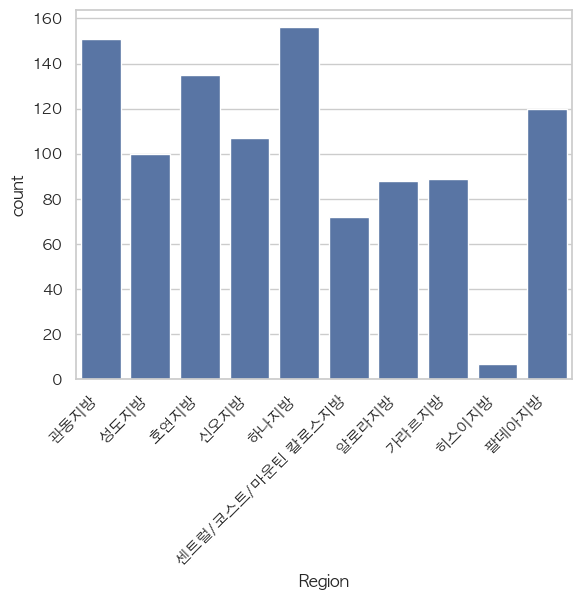

In [37]:
# Countplot | 지방별 포켓몬 수 시각화
plt.figure(dpi= 100)
plt.xticks(rotation=45, ha='right')
sns.countplot(x='Region', data = df)
plt.show()

In [38]:
# 고윳값 추출
# 타입별 카운트를 알아보기 위해 고윳값을 추출합니다.

type_list = list(df['Type_1'].unique())
print(type_list)

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


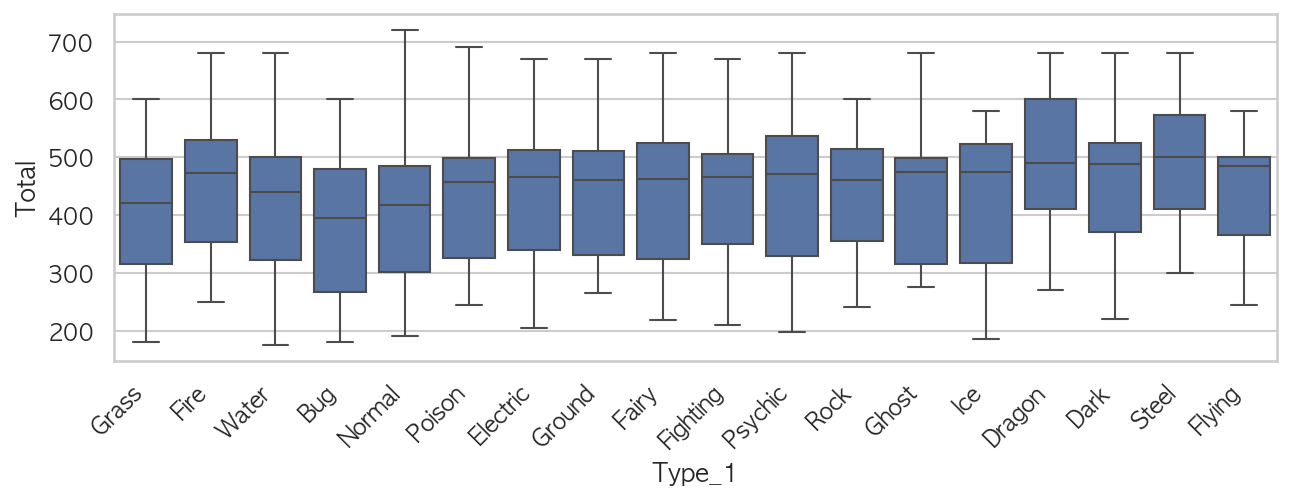

In [39]:
# Boxplot | 타입_1별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150) # 여기에서 출력 사이즈를 지정합니다.
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_1', y = 'Total', data = df)
plt.show()

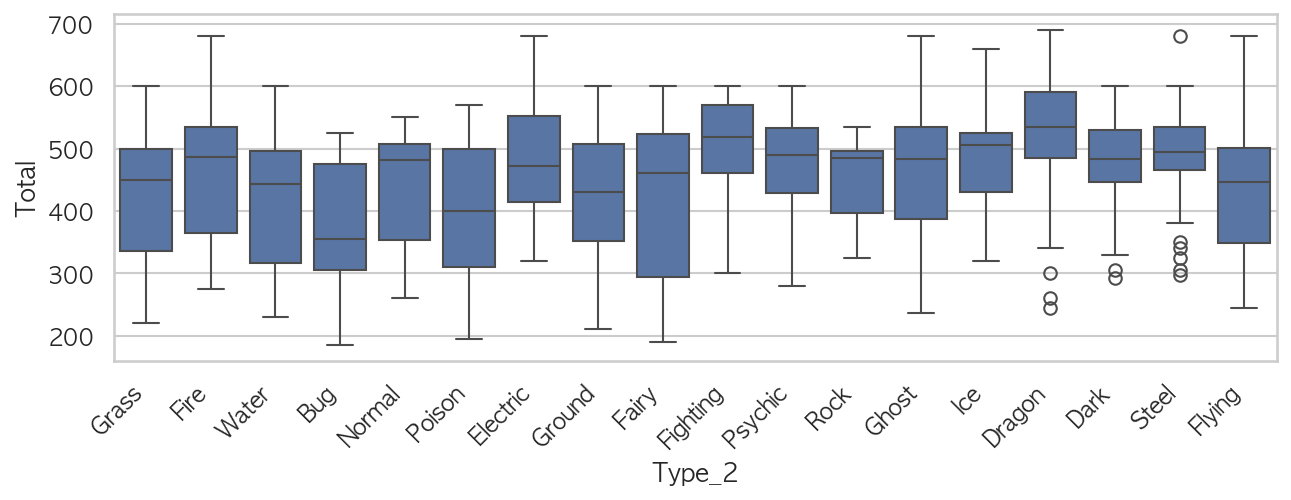

In [40]:
# Boxplot | 타입_2별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150) # 여기에서 출력 사이즈를 지정합니다.
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_2', y = 'Total', data = df, order=type_list)
plt.show()

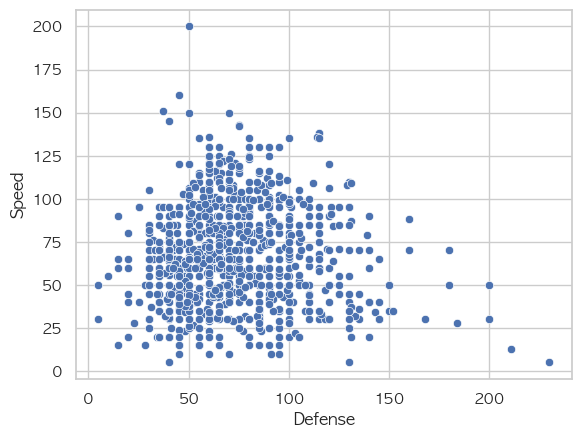

In [41]:
# Scatterplot | 두 개의 연속형 데이터의 분포
plt.figure(dpi=100)
sns.scatterplot(x='Defense', y='Speed', data=df)
plt.show()

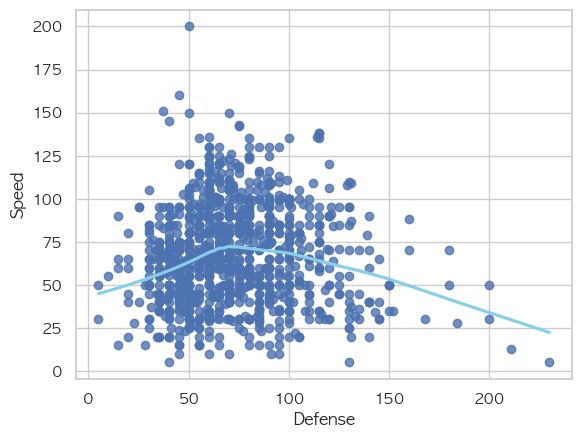

In [42]:
# Regplot | Scatterplot + Regression Line
plt.figure(dpi=100)
sns.regplot(x='Defense', y='Speed', lowess=True, data=df, line_kws={'color' : 'skyblue'})
plt.show()

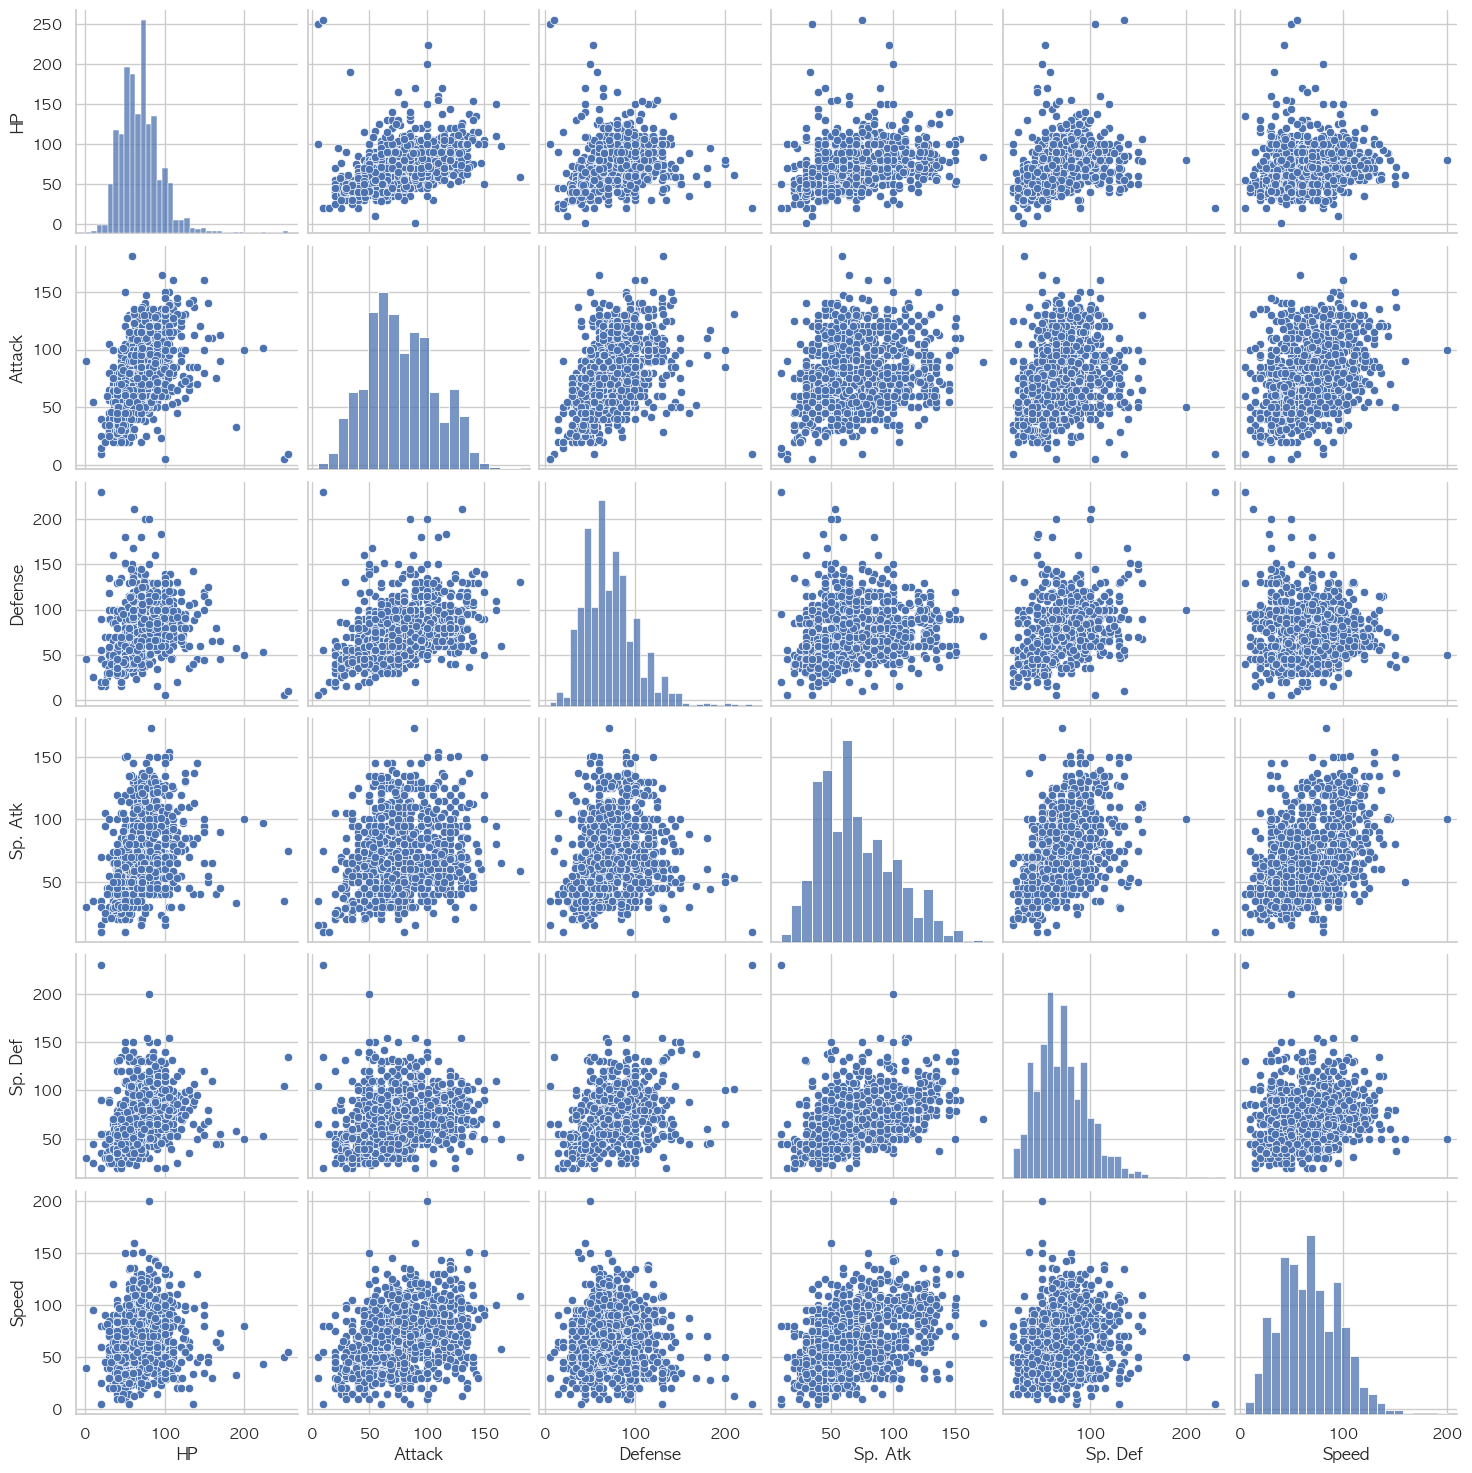

In [43]:
# Pairplot | 모든 연속형 데이터의 Scatterplot과 히스토그램을 보고 싶을 때
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.show()

In [44]:
# 인덱스를 활용한 컬럼(또는 로우) 추출
df_num = df.iloc[:, 4:10]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   HP       1025 non-null   int64
 1   Attack   1025 non-null   int64
 2   Defense  1025 non-null   int64
 3   Sp. Atk  1025 non-null   int64
 4   Sp. Def  1025 non-null   int64
 5   Speed    1025 non-null   int64
dtypes: int64(6)
memory usage: 48.2 KB


## 데이터 군집화
Clustering이라고도 불리는 군집화는 대표적인 **비지도 학습 기법** 중에 하나입니다.<br>
포켓몬을 능력치에 따라 구분한다고 하더라도 어떤 기준에 따라 군집화해야 할지 모를 수 있습니다.<br> 비지도 학습은 우리가 정답을 알지 못하더라도, 통계적인 기법을 통해 군집을 나눌 수 있도록 도와줍니다.<br>
물론, 비지도 학습의 특성상 정해진 답이 없기 때문에 최적의 값을 찾기 위한 시행착오가 있을 수 있습니다.

### 차원 축소 모델 (2차원 투영)
보통 하나의 컬럼이 하나의 차원을 이룹니다.<br>
쉽게 생각해보면 X축과 Y축이 보통 우리가 생각하는 2차원인데요, 여기에 Z축이 포함된다면 3차원이라고 부르지요. 이처럼 하나의 축이 차원이라고 보시면 됩니다.<br>
하지만 군집화를 위해서는 우선 2차원 평면으로 **투영(Projection)**해야 합니다. 정보의 손실을 최소화하면서 2차원 값을 추출하는 방법으로는 PCA와 t-SNE가 있습니다. 자세한 설명은 생략하고 오늘은 코드만 구현해보겠습니다.

In [45]:
df_num

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80
...,...,...,...,...,...,...
1020,125,73,91,137,89,75
1021,90,120,80,68,108,124
1022,90,72,100,122,108,98
1023,90,65,85,65,85,60


In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
result_pca = pca.fit_transform(df_num)
df[['X_pca', 'Y_pca']] = result_pca

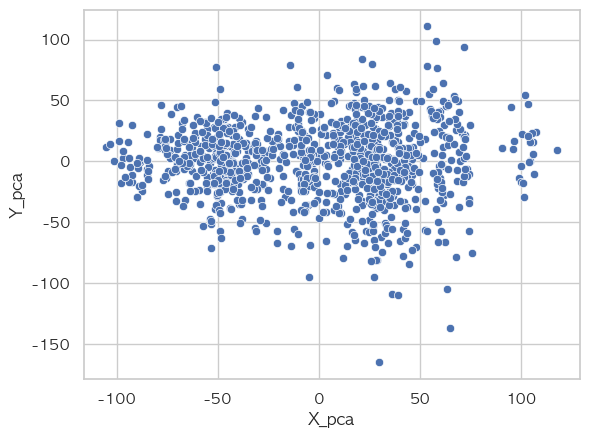

In [47]:
# PCA 차원 축소 결과
sns.scatterplot(x='X_pca', y='Y_pca', data=df)
plt.show()

In [48]:
tsne = TSNE(n_components=2, learning_rate = 1000, random_state = 319)
result_tsne = tsne.fit_transform(df_num)
df[['X', 'Y']] = result_tsne

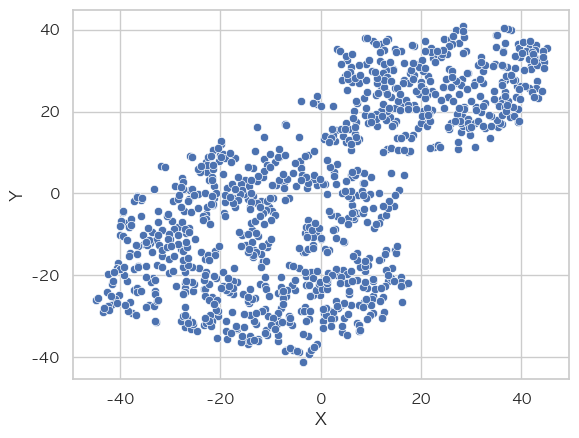

In [49]:
# t-SNE 차원 축소 결과
sns.scatterplot(x='X', y='Y', data=df)
plt.show()

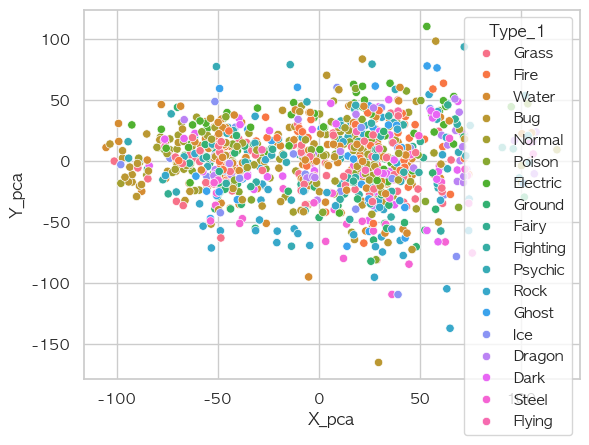

In [50]:
# 포켓몬 타입과 군집의 상관 관계가 있을까?
sns.scatterplot(x='X_pca', y='Y_pca', data=df, hue='Type_1')
plt.show()

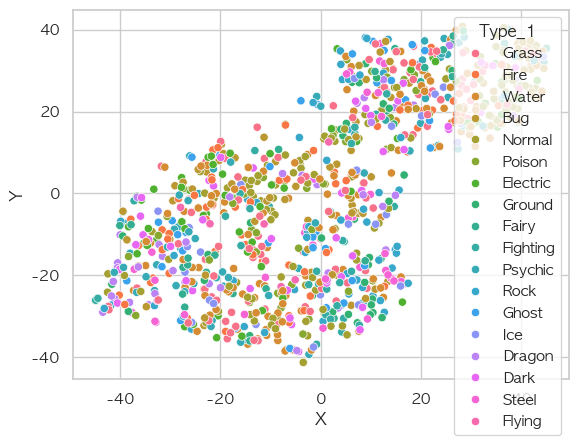

In [51]:
sns.scatterplot(x='X', y='Y', data=df, hue='Type_1')
plt.show()

### 데이터 군집화 모델

In [52]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [53]:
# DBSCAN 모델
cluster = DBSCAN(eps=3)
# 학습 후 동시에 예측 결과
label = cluster.fit_predict(df[['X', 'Y']])
df['Cluster_DB'] = label

In [54]:
# 클러스터 0 1 2 3 노이즈 -1
df['Cluster_DB'].unique()

array([ 0,  1, -1,  3,  2])

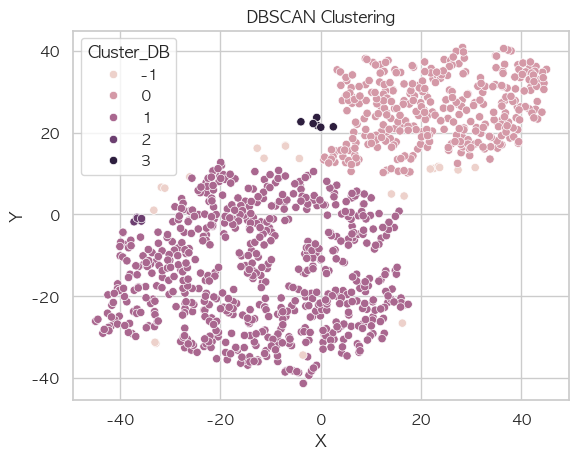

In [55]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster_DB', data = df)
plt.title('DBSCAN Clustering')
plt.show()

In [56]:
# KMeans 모델
kmeans = KMeans(n_clusters=8, random_state=319, n_init='auto')
label = kmeans.fit_predict(df[['X', 'Y']])
df['Cluster_KM'] = label

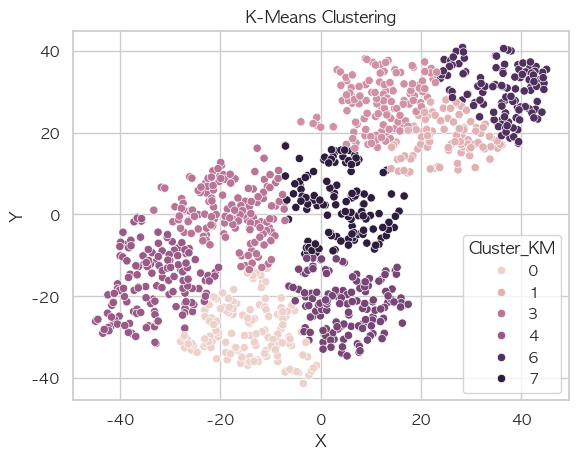

In [57]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster_KM', data = df)
plt.title('K-Means Clustering')
plt.show()

In [58]:
# 클러스터에 어떤 포켓몬이 포함되어 있을까?
cluster = 2
df[df['Cluster_KM'] == cluster][['Name', 'Total']]

,Name,Total
6,꼬부기,314
26,모래두지,300
28,니드런♀,275
34,삐삐,323
45,파라스,285
...,...,...
964,부르롱,300
968,초롱순,350
970,망망이,290
995,드니차,320


# [복습 과제 1] 최적 모델과 하이퍼 파라미터 찾기
위의 코드를 활용해 DBSCAN과 K-Means의 하이퍼 파라미터를 조정하며 최적의 군집을 나타내는 모델과 그때의 하이퍼 파라미터를 찾습니다. 두 모델의 특징을 비교하며 더 나아가 최적이라고 판단한 이유를 작성해주시면 됩니다.

그리고 최적 모델 이미지와 작성한 내용을 캡처하여 Slack 채널에 공유해주세요.

Best DBSCAN - eps: 4, min_samples: 13, silhouette_score: 0.3592803180217743


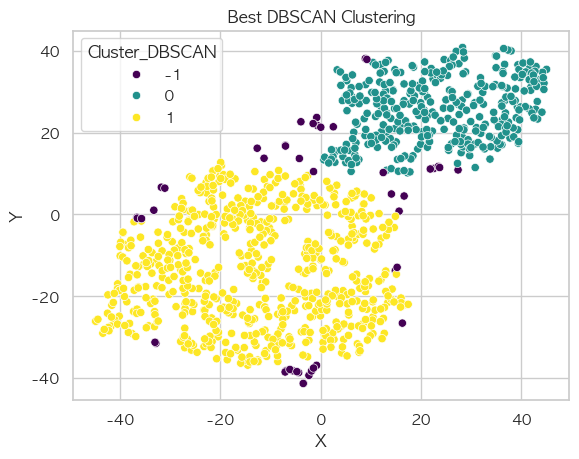

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN 파라미터 조정
_

eps_values = range(1, 11) # 이웃을 포함하는 반경
min_samples_values = range(5, 20) # 최소 이웃 수 
best_silhouette_dbscan = -1  # 초기값을 매우 낮은 값으로 설정
best_dbscan = None  # 초기값을 None으로 설정


for eps in eps_values:
    for min_samples in min_samples_values:
        cluster_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = cluster_dbscan.fit_predict(df[['X', 'Y']])

        if len(set(clusters_dbscan)) > 1:  # 군집이 2개 이상이어야 silhouette_score를 계산할 수 있음.
            silhouette_avg = silhouette_score(df[['X', 'Y']], clusters_dbscan)
            if silhouette_avg > best_silhouette_dbscan:
                best_silhouette_dbscan = silhouette_avg
                best_dbscan = (eps, min_samples)

print(f"Best DBSCAN - eps: {best_dbscan[0]}, min_samples: {best_dbscan[1]}, silhouette_score: {best_silhouette_dbscan}")

# 최적 DBSCAN 모델로 시각화
cluster_dbscan = DBSCAN(eps=best_dbscan[0], min_samples=best_dbscan[1])
df['Cluster_DBSCAN'] = cluster_dbscan.fit_predict(df[['X', 'Y']])

sns.scatterplot(x='X', y='Y', hue='Cluster_DBSCAN', data=df, palette='viridis')
plt.title('Best DBSCAN Clustering')
plt.show()

Best K-Means - n_clusters: 2, silhouette_score: 0.5470542311668396


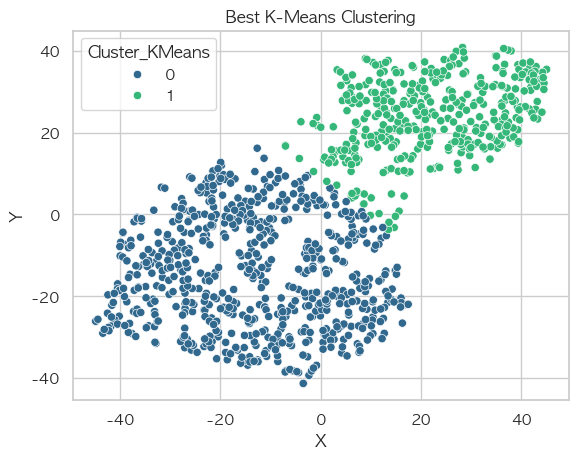

In [60]:
from sklearn.cluster import KMeans

# K-Means 파라미터 조정
###

k_range = range(2,11) # 군집 개수
best_silhouette_kmeans = -1  # 초기값
best_kmeans = None  # 초기값



for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=319, n_init='auto')
    clusters_kmeans = kmeans.fit_predict(df[['X', 'Y']])

    silhouette_avg = silhouette_score(df[['X', 'Y']], clusters_kmeans)
    if silhouette_avg > best_silhouette_kmeans:
        best_silhouette_kmeans = silhouette_avg
        best_kmeans = k

print(f"Best K-Means - n_clusters: {best_kmeans}, silhouette_score: {best_silhouette_kmeans}")

kmeans = KMeans(n_clusters=best_kmeans, random_state=319, n_init='auto')
df['Cluster_KMeans'] = kmeans.fit_predict(df[['X', 'Y']])

# 최적 K-Means 모델로 시각화
###

sns.scatterplot(x='X', y='Y', hue='Cluster_KMeans', data=df, palette='viridis')
plt.title('Best K-Means Clustering')
plt.show()


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means 파라미터 조정
###

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=319, n_init='auto')
    clusters_kmeans = kmeans.fit_predict(df[['X', 'Y']])
    silhouette_avg = silhouette_score(df[['X', 'Y']], clusters_kmeans)

    if silhouette_avg > best_silhouette_kmeans:
        best_silhouette_kmeans = silhouette_avg
        best_kmeans = k

print(f"Best K-Means - n_clusters: {best_kmeans}, silhouette_score: {best_silhouette_kmeans}")


Best K-Means - n_clusters: 2, silhouette_score: 0.5470542311668396


선정 모델: KMeans

하이퍼 파라미터: n_clusters=2

모델의 특징 비교 및 군집 결과에 대한 해석(최적 판단 이유): silhouette_score가 1에 더 가깝기 때문이다.

# [복습 과제 2] Boxplot 시각화 후 결과 해석

약간의 데이터프레임 조작을 통해, 박스플롯 시각화를 용이하게 만들었습니다.

`melted_df` 를 활용해 **능력치별 클러스터의 분포 차이**와 **클러스터별 능력치 분포 차이**를 분석해봅니다.

In [62]:
df.head()

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Physical,Special,X_pca,Y_pca,X,Y,Cluster_DB,Cluster_KM,Cluster_DBSCAN,Cluster_KMeans
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,...,98,130,-44.111389,4.642072,22.316305,25.011181,0,1,0,1
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,...,125,160,-8.969019,7.082576,7.448679,5.327852,1,7,1,1
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,...,165,200,39.681422,9.152796,-21.741747,-25.265327,1,0,1,0
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,95,110,-49.244147,21.151634,28.301456,18.931080,0,1,0,1
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,122,145,-10.372673,24.769446,-21.479378,10.624026,1,3,1,0


In [63]:
# 추출하고자 하는 컬럼명
cols = 'Total'

In [64]:
# 추출하고자 하는 컬럼명 추가
cols_2 = 'Cluster_KM'

In [65]:
# 데이터 재구조화 (pd.melt)
melted_df = pd.melt(df, id_vars=['Cluster_KM'], value_vars=['Total'], var_name='Total', value_name='value')

In [66]:
melted_df

,Cluster_KM,Total,value
0,1,Total,318
1,7,Total,405
2,0,Total,525
3,1,Total,309
4,3,Total,405
...,...,...,...
1020,0,Total,590
1021,4,Total,590
1022,4,Total,590
1023,0,Total,450


In [67]:
# 클러스터 확인
melted_df['Cluster_KM'].unique()

array([1, 7, 0, 3, 4, 2, 6, 5], dtype=int32)

In [68]:
# 클러스터별 포켓몬 수 카운트
cluster_counts = melted_df['Cluster_KM'].value_counts(ascending=False)
cluster_counts

Cluster_KM
4    150
3    144
0    138
5    137
2    125
7    122
6    115
1     94
Name: count, dtype: int64

In [69]:
# 클러스터별 능력치 평균
cluster_tot_means = melted_df.groupby('Cluster_KM')['value'].mean()
cluster_tot_means

Cluster_KM
0    494.775362
1    315.489362
2    310.664000
3    468.513889
4    579.713333
5    498.007299
6    255.530435
7    406.352459
Name: value, dtype: float64

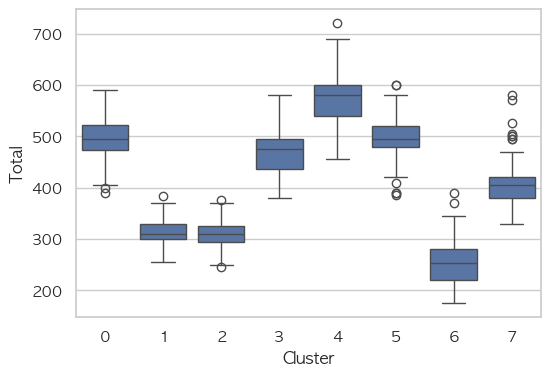

In [71]:
# 클러스터별 Total 박스플롯
plt.figure(figsize = (6, 4), dpi = 100)
sns.boxplot(data=melted_df, x='Cluster_KM', y='value')
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.show()

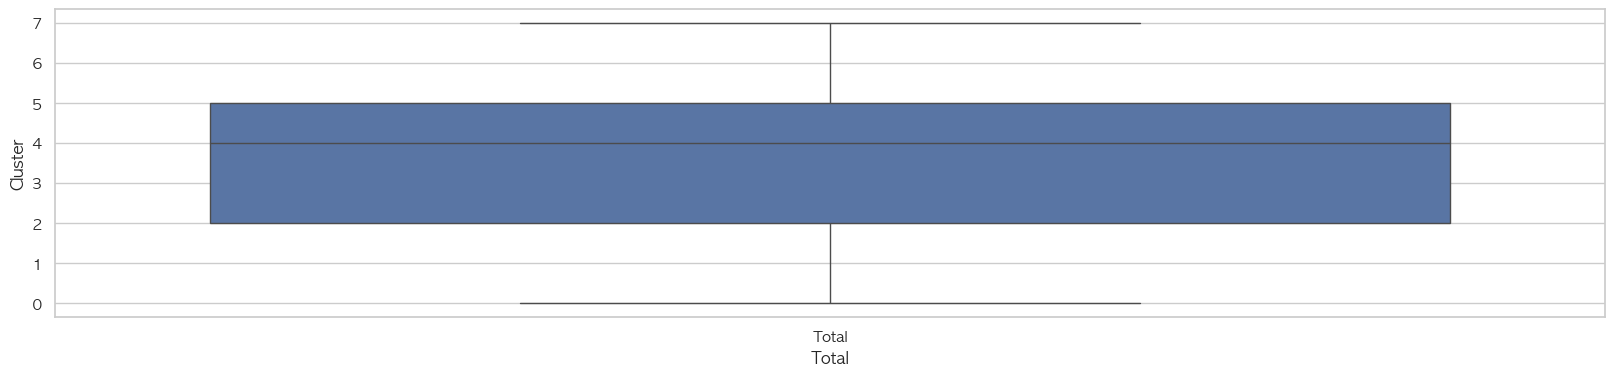

In [72]:
# 능력치 기준 클러스터 박스플롯
plt.figure(figsize = (20, 4), dpi = 100)

sns.boxplot(data=melted_df, x='Total', y='Cluster_KM')
plt.xlabel('Total')
plt.ylabel('Cluster')


plt.show()

결과에 대한 해석:4번 클러스터의 중앙값이 가장 높으므로 비교적 높은 능력치를 가진 군집이다.다만 박스의 길이가 길고 수염이 길기 때문에 데이터가 다른 군집에 비해 비교적 넓게 퍼져 있음을 확인할 수 있다. 
총 능력치의 평균보다 중앙값이 높게 위치해 있음을 알 수 있다. 

In [73]:
df_num

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80
...,...,...,...,...,...,...
1020,125,73,91,137,89,75
1021,90,120,80,68,108,124
1022,90,72,100,122,108,98
1023,90,65,85,65,85,60


In [74]:
# 클러스터 기준 세부 능력치 박스플롯
stat = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
melted_df_2 = pd.melt(df, id_vars=['Cluster_KM'], value_vars=stat, var_name='stat', value_name='value')
melted_df_2

,Cluster_KM,stat,value
0,1,HP,45
1,7,HP,60
2,0,HP,80
3,1,HP,39
4,3,HP,58
...,...,...,...
6145,0,Speed,75
6146,4,Speed,124
6147,4,Speed,98
6148,0,Speed,60


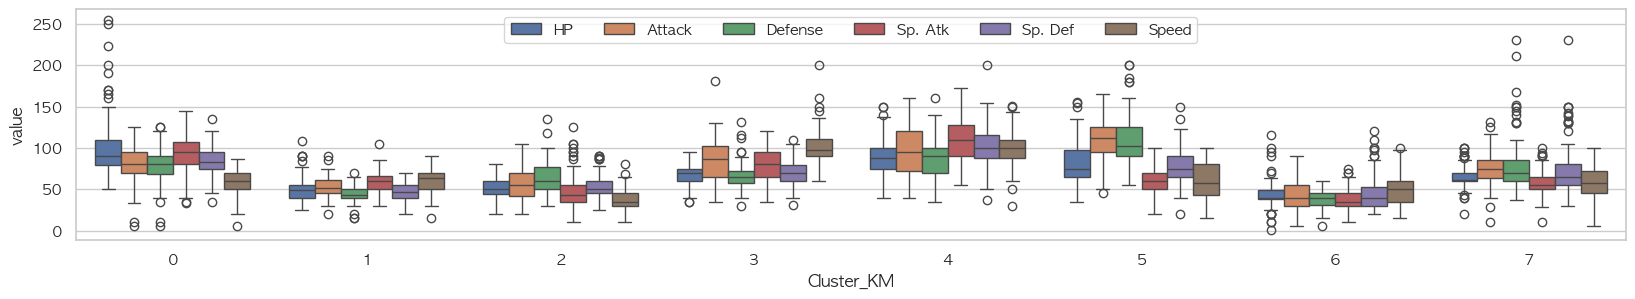

In [75]:
plt.figure(figsize = (20, 3), dpi = 100)
sns.boxplot(data = melted_df_2, x = 'Cluster_KM', y = 'value', hue = 'stat')
plt.legend(ncol = 8)
plt.show()

결과에 대한 해석: 4번 클러스터를 보면, 전체 능력치랑 세부 능력치별로 나눠서 봤을 때 전체 능력치를 봤일 때와 비슷한 경향인 것을 확인할 수 있다. 
클러스터마다 세부 능력치의 차이가 크지 않는데, 5번 클러스터는 비교적 세부 능력치 간 차이가 있다. 
1번 클러스터는 다른 클러스터들보다 데이터가 좁은 범위에 몰려있고, 이상치도 크게 벗어나 있지 않음을 확인할 수 있다. 